In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
# path to project data (replace with your own path)
file_path = r'C:\Users\liamd\Desktop\finans_project\finans1_data.csv'
## Read data into a pandas DataFrame    
D = pd.read_csv(file_path, delimiter=";")
D[["t","AGG","VAW","IWN","SPY"]]

,t,AGG,VAW,IWN,SPY
0,2006-5-5,-0.006088,0.031573,0.023603,0.007987
1,2006-5-12,-0.003675,-0.027460,-0.048072,-0.024751
2,2006-5-19,0.006661,-0.050000,-0.014096,-0.016558
3,2006-5-26,0.001832,0.012539,0.009717,0.010071
4,2006-6-5,-0.004775,-0.022321,-0.017734,-0.009815
...,...,...,...,...,...
449,2015-4-10,-0.001615,0.016019,0.000193,0.017438
450,2015-4-17,0.003775,-0.003171,-0.010406,-0.009950
451,2015-4-24,-0.001522,0.011181,0.010418,0.017793
452,2015-5-1,-0.010404,0.014923,-0.023800,-0.004394


In [9]:
#b) 

# Calculating summary statistics
D2 = D[["AGG", "VAW", "IWN", "SPY"]]

# Basic stats
count = D2.count()
mean = D2.mean()
var = D2.var()
std = D2.std()

# Quartiles
Q1 = D2.quantile(0.25)
median = D2.quantile(0.5)
Q3 = D2.quantile(0.75)

# DataFrame
summary = pd.DataFrame({
    "Number of obs": count,
    "Sample mean": mean,
    "Sample variance": var,
    "std. dev.": std,
    "Lower quartile": Q1,
    "Median": median,
    "Upper quartile": Q3
})

# display and show the result
summary = summary.round(6)
summary



,Number of obs,Sample mean,Sample variance,std. dev.,Lower quartile,Median,Upper quartile
AGG,454,0.000266,0.000036,0.005976,-0.002973,0.000237,0.003893
VAW,454,0.001794,0.001302,0.036083,-0.016096,0.004798,0.019685
IWN,454,0.001188,0.001025,0.032015,-0.014305,0.003120,0.019056
SPY,454,0.001360,0.000614,0.024786,-0.011325,0.004216,0.014498


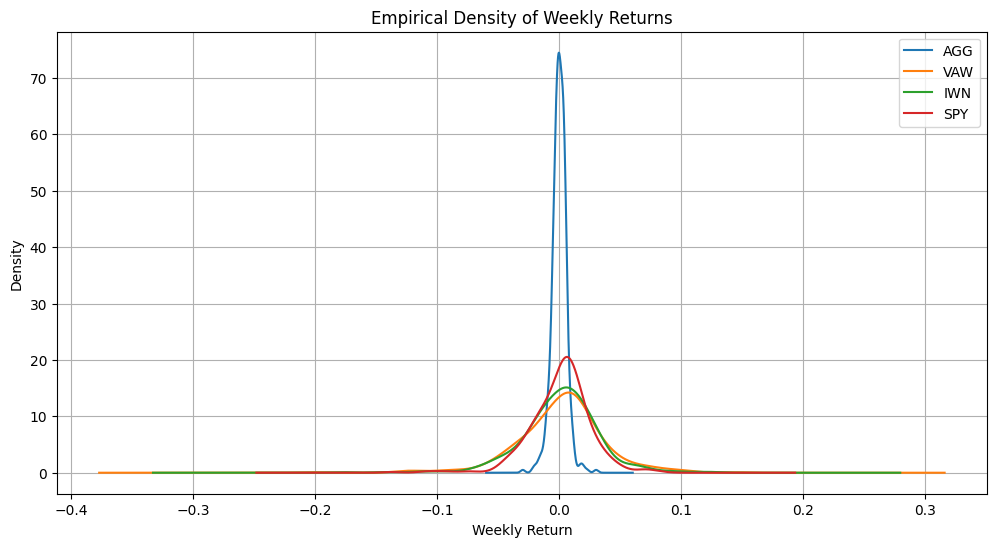

(AGG   -0.0296
 VAW   -0.2037
 IWN   -0.1797
 SPY   -0.1376
 dtype: float64,
 AGG    0.0305
 VAW    0.1430
 IWN    0.1267
 SPY    0.0833
 dtype: float64)

In [10]:


#  density plots for the 4 ETFs
plt.figure(figsize=(12, 6))
for col in ["AGG", "VAW", "IWN", "SPY"]:
    D2[col].plot(kind="kde", label=col)  # Kernel density estimate
plt.title("Empirical Density of Weekly Returns")
plt.xlabel("Weekly Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


# getting min and max weekly return for each ETF
D2.min().round(4), D2.max().round(4)


<Figure size 1000x600 with 0 Axes>

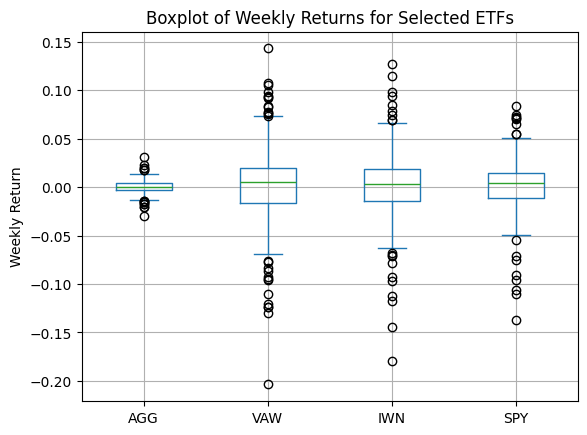

In [11]:
# Creating a boxplot for the selected ETFs
plt.figure(figsize=(10, 6))
D2[["AGG", "VAW", "IWN", "SPY"]].plot.box()
plt.title("Boxplot of Weekly Returns for Selected ETFs")
plt.ylabel("Weekly Return")
plt.grid(True)
plt.show()


In [12]:
# The 3 ETFs
etfs = D[["AGG", "VAW", "IWN"]]

# covariance matrix
cov_matrix = etfs.cov()
print("Covariance matrix:")
print(cov_matrix.round(6))

# correlation matrix
corr_matrix = etfs.corr()
print("\nCorrelation matrix:")
print(corr_matrix.round(6))


Covariance matrix:
          AGG       VAW       IWN
AGG  0.000036 -0.000043 -0.000026
VAW -0.000043  0.001302  0.000984
IWN -0.000026  0.000984  0.001025

Correlation matrix:
          AGG       VAW       IWN
AGG  1.000000 -0.197568 -0.135262
VAW -0.197568  1.000000  0.851641
IWN -0.135262  0.851641  1.000000


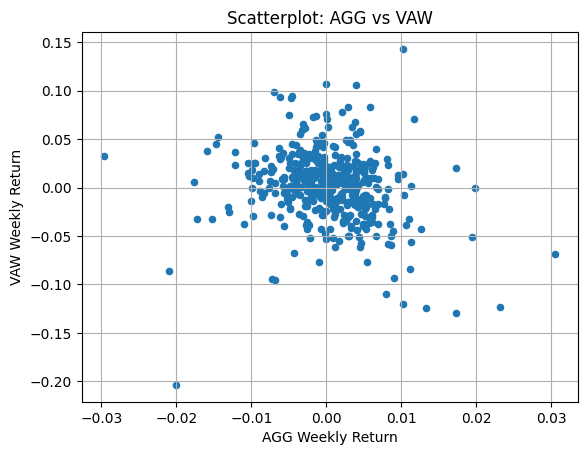

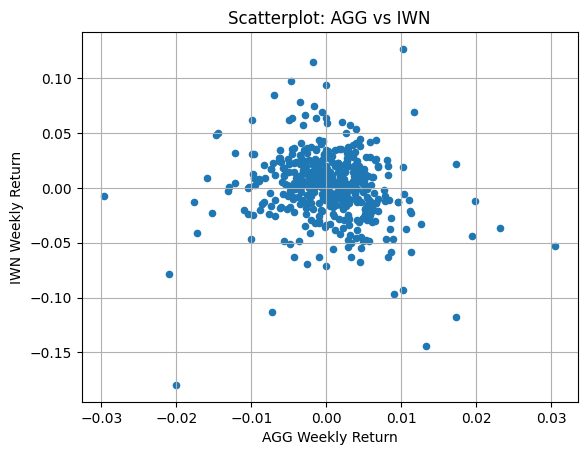

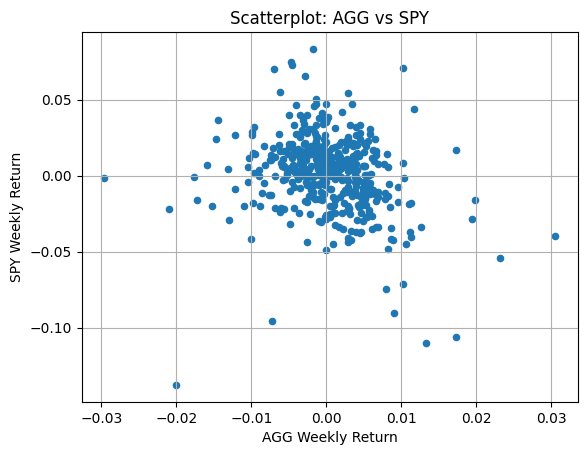

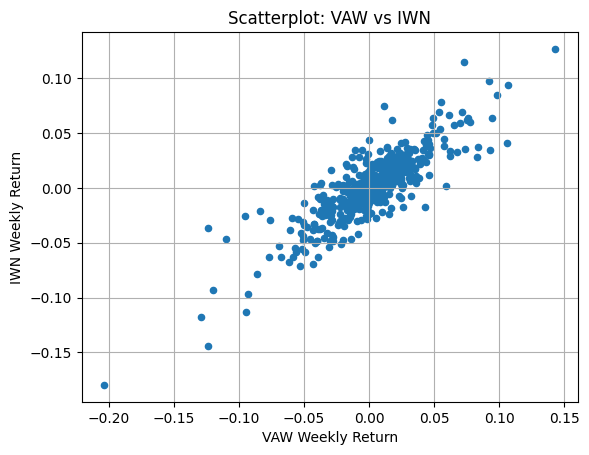

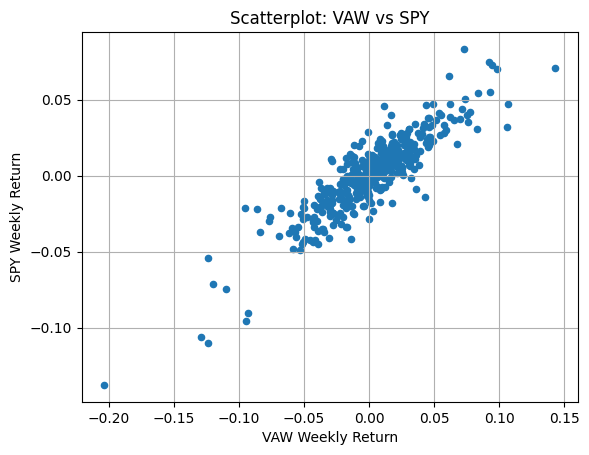

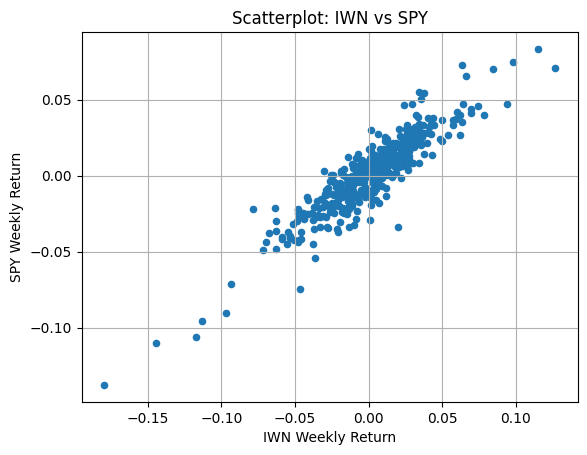

In [34]:


# List of ETF pairs
etfs = ["AGG", "VAW", "IWN", "SPY"]
pairs = [
    ("AGG", "VAW"),
    ("AGG", "IWN"),
    ("AGG", "SPY"),
    ("VAW", "IWN"),
    ("VAW", "SPY"),
    ("IWN", "SPY")
]

# Create scatterplots
for x, y in pairs:
    D.plot.scatter(x=x, y=y)
    plt.title(f"Scatterplot: {x} vs {y}")
    plt.xlabel(f"{x} Weekly Return")
    plt.ylabel(f"{y} Weekly Return")
    plt.grid(True)
    plt.show()


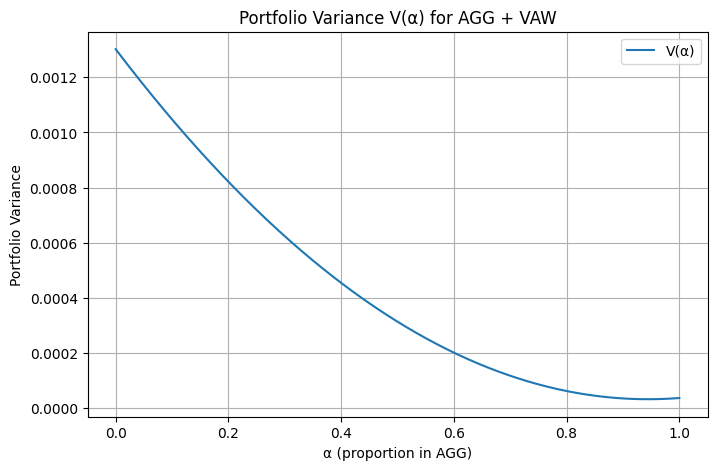

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from earlier results
var_AGG = 0.000036
var_VAW = 0.001302
cov_AGG_VAW = -0.000043

# Alpha values from 0 to 1 (proportion invested in AGG)
alpha = np.linspace(0, 1, 500)

# V(alpha): Portfolio variance as a function of alpha
V_alpha = (
    alpha**2 * var_AGG +
    (1 - alpha)**2 * var_VAW +
    2 * alpha * (1 - alpha) * cov_AGG_VAW
)

# plot of variance function
plt.figure(figsize=(8, 5))
plt.plot(alpha, V_alpha, label="V(α)")
plt.title("Portfolio Variance V(α) for AGG + VAW")
plt.xlabel("α (proportion in AGG)")
plt.ylabel("Portfolio Variance")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#  Find minimum variance and optimal alpha (αₘ)
min_variance = V_alpha.min()
alpha_m = alpha[np.argmin(V_alpha)]


# Find minimum variance and optimal alpha (αₘ)
min_variance = V_alpha.min()
alpha_m = alpha[np.argmin(V_alpha)]

print(f"Minimum variance: {min_variance:.6f}")
print(f"Alpha that minimizes variance (αₘ): {alpha_m:.4f}")


Minimum variance: 0.000032
Alpha that minimizes variance (αₘ): 0.9439


In [16]:
# ETF combinations
etf_pairs = [
    ("AGG", "VAW"),
    ("AGG", "IWN"),
    ("AGG", "SPY"),
    ("VAW", "IWN"),
    ("VAW", "SPY"),
    ("IWN", "SPY")
]

alpha_results = []

# Loop over each pair and calculate αₘ and min variance
for etf1, etf2 in etf_pairs:
    var1 = D[[etf1]].var().values[0]
    var2 = D[[etf2]].var().values[0]
    cov = D[[etf1, etf2]].cov().iloc[0, 1]

    alpha_vals = np.linspace(0, 1, 500)
    V_alpha = (
        alpha_vals**2 * var1 +
        (1 - alpha_vals)**2 * var2 +
        2 * alpha_vals * (1 - alpha_vals) * cov
    )

    alpha_m = alpha_vals[np.argmin(V_alpha)]
    min_var = V_alpha.min()

    alpha_results.append({
        "Portfolio": f"{etf1} + {etf2}",
        f"αₘ (in {etf1})": round(alpha_m, 4),
        "Min Variance": round(min_var, 6)
    })

# Convert to DataFrame
df_alpha_m = pd.DataFrame(alpha_results)
df_alpha_m


,Portfolio,αₘ (in AGG),Min Variance,αₘ (in VAW),αₘ (in IWN)
0,AGG + VAW,0.9459,0.000031,NaN,NaN
1,AGG + IWN,0.9439,0.000032,NaN,NaN
2,AGG + SPY,0.9038,0.000029,NaN,NaN
3,VAW + IWN,NaN,0.001020,0.1142,NaN
4,VAW + SPY,NaN,0.000614,0.0000,NaN
5,IWN + SPY,NaN,0.000614,NaN,0.0


In [ ]:
# ETF pairs and corresponding alpha_m values
etf_pairs_alpha = [
    ("AGG", "VAW", 0.9459),
    ("AGG", "IWN", 0.9439),
    ("AGG", "SPY", 0.9038),
    ("VAW", "IWN", 0.1142),
    ("VAW", "SPY", 0.0000),
    ("IWN", "SPY", 0.0000)
]

# Calculate expected return for each portfolio
expected_returns = []

for etf1, etf2, alpha_m in etf_pairs_alpha:
    mu1 = D[etf1].mean()
    mu2 = D[etf2].mean()
    E_Pi = alpha_m * mu1 + (1 - alpha_m) * mu2

    expected_returns.append({
        "Portfolio": f"{etf1} + {etf2}",
        "αₘ (in " + etf1 + ")": round(alpha_m, 4),
        "E(Pᵢ)": round(E_Pi, 6)
    })

df_expected = pd.DataFrame(expected_returns)
df_expected


,Portfolio,αₘ (in AGG),E(Pᵢ),αₘ (in VAW),αₘ (in IWN)
0,AGG + VAW,0.9459,0.000348,NaN,NaN
1,AGG + IWN,0.9439,0.000317,NaN,NaN
2,AGG + SPY,0.9038,0.000371,NaN,NaN
3,VAW + IWN,NaN,0.001257,0.1142,NaN
4,VAW + SPY,NaN,0.001360,0.0000,NaN
5,IWN + SPY,NaN,0.001360,NaN,0.0


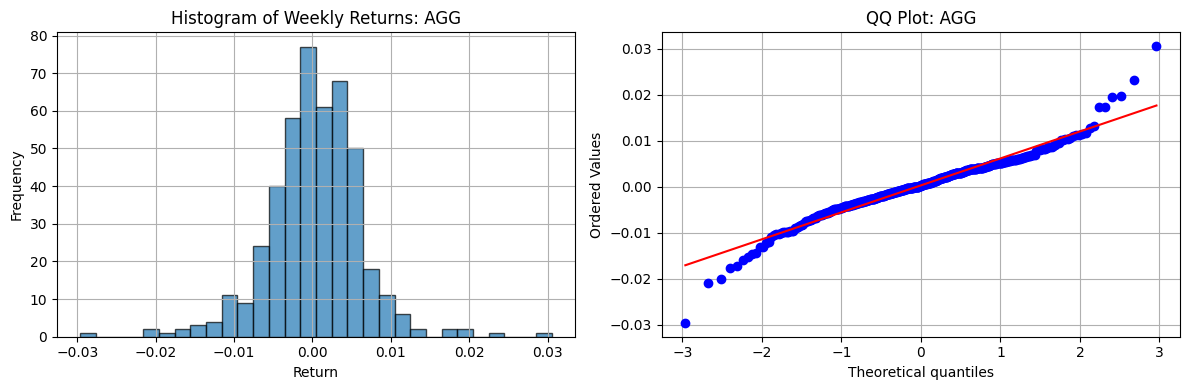

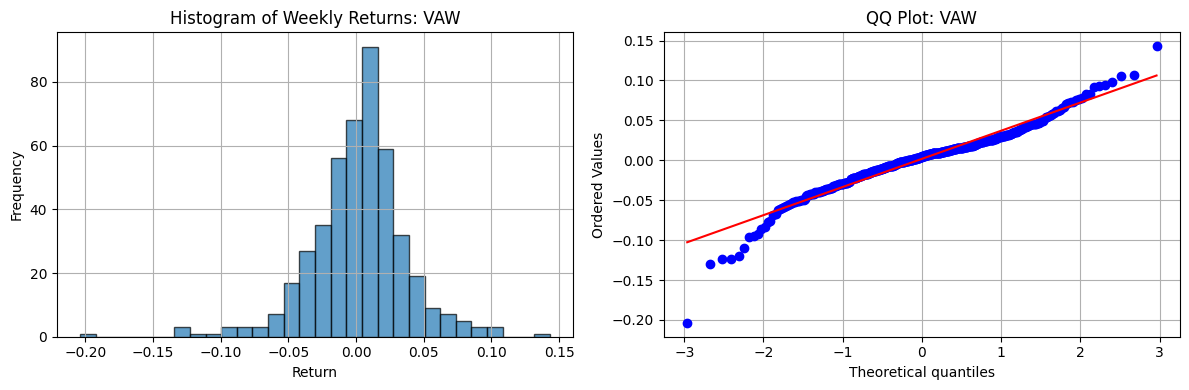

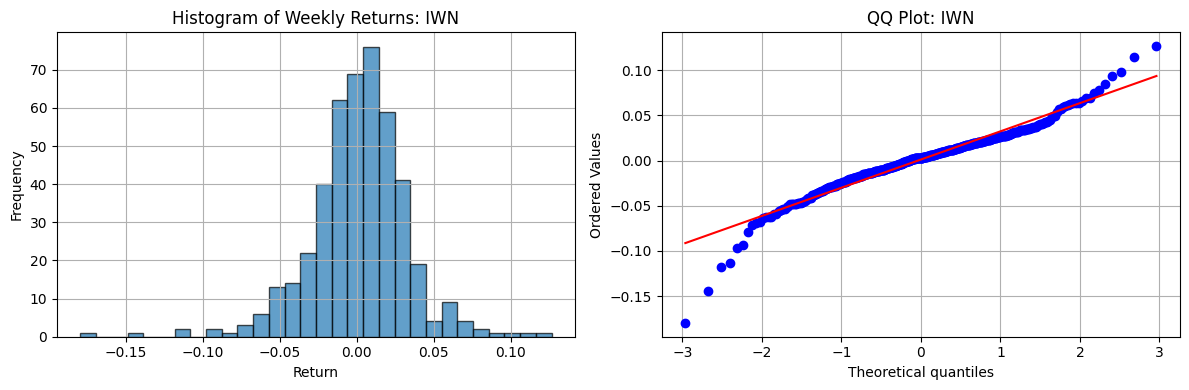

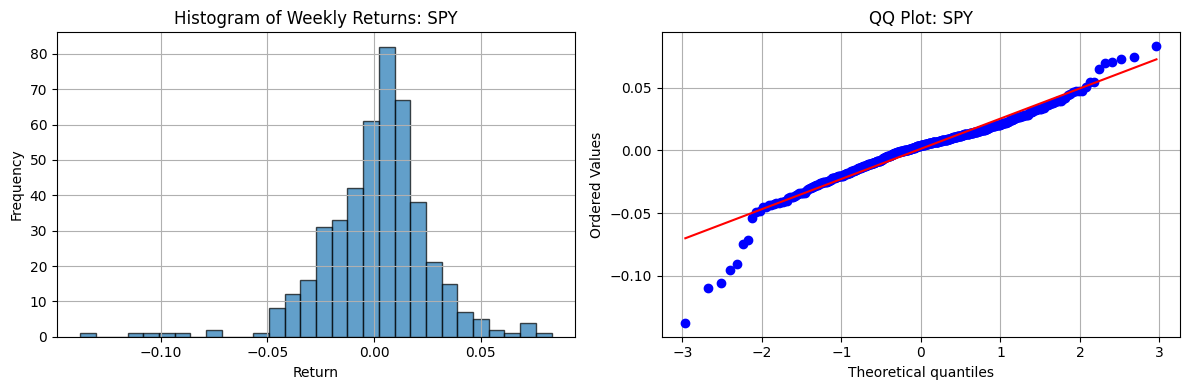

In [20]:


# Loop through each ETF
for etf in ["AGG", "VAW", "IWN", "SPY"]:
    returns = D[etf]
    
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(returns, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of Weekly Returns: {etf}")
    plt.xlabel("Return")
    plt.ylabel("Frequency")
    plt.grid(True)

    # QQ plot
    plt.subplot(1, 2, 2)
    stats.probplot(returns, dist="norm", plot=plt)
    plt.title(f"QQ Plot: {etf}")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [22]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Assuming D is your DataFrame containing ETF returns
etfs = ["AGG", "VAW", "IWN", "SPY"]
n = len(D)  # Number of observations
z = norm.ppf(0.975)  # 1.96 for 95% confidence

# Store results
ci_results = []

for etf in etfs:
    x̄ = D[etf].mean()         # Sample mean
    s = D[etf].std(ddof=1)     # Sample standard deviation
    se = s / np.sqrt(n)        # Standard error
    lower = x̄ - z * se
    upper = x̄ + z * se
    width = upper - lower

    ci_results.append({
        "ETF": etf,
        "Mean": round(x̄, 6),
        "95% CI Lower": round(lower, 6),
        "95% CI Upper": round(upper, 6),
        "CI Width": round(width, 6)
    })

# Convert to DataFrame
ci_df = pd.DataFrame(ci_results)
print(ci_df)


   ETF      Mean  95% CI Lower  95% CI Upper  CI Width
0  AGG  0.000266     -0.000284      0.000815  0.001099
1  VAW  0.001794     -0.001525      0.005113  0.006638
2  IWN  0.001188     -0.001757      0.004133  0.005890
3  SPY  0.001360     -0.000920      0.003640  0.004560
